In [1]:
import numpy as np
import meep as mp
import matplotlib.pyplot as plt

In [2]:
complex(0)

0j

In [3]:
alphawave_signal = np.loadtxt("alphawave_fs_10khz.csv")
fs = 10e3

In [4]:
def alphawave(t):
    
    sample = round(t*fs)
    return complex(alphawave_signal[sample])




-----------
Initializing structure...
time for choose_chunkdivision = 0.00110316 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 10
time for set_epsilon = 0.0372851 s
-----------


FloatProgress(value=0.0, description='0% done ', max=50.0)

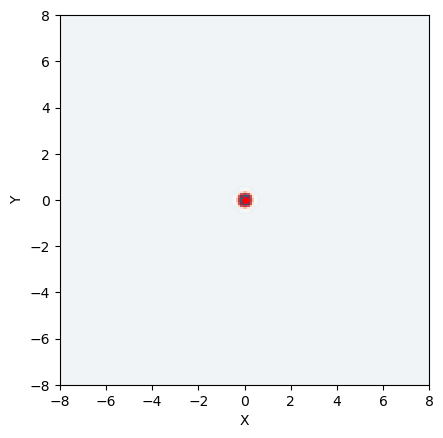

Meep progress: 22.0/50.0 = 44.0% done in 4.0s, 5.1s to go
on time step 440 (time=22), 0.00912801 s/step
Meep progress: 48.0/50.0 = 96.0% done in 8.0s, 0.3s to go
on time step 960 (time=48), 0.00770993 s/step
run 0 finished at t = 50.0 (1000 timesteps)


In [5]:
cell = mp.Vector3(16,16,0)
geometry = []
sources = [mp.Source(mp.CustomSource(alphawave, end_time=1e+20),component=mp.Bz,center=mp.Vector3(0,0)), ]
pml_layers = [mp.PML(1.0)]
# pml_layers = []

resolution = 10
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)
animate = mp.Animate2D(fields=mp.Bz,
                       realtime=True,
                       field_parameters={'alpha':0.8, 'cmap':'RdBu', 'interpolation':'none'},
                       boundary_parameters={'hatch':'o', 'linewidth':1.5, 'facecolor':'y', 'edgecolor':'b', 'alpha':0})
sim.run(mp.at_every(1,animate),until=50);
animate.to_jshtml(fps = 1000)